In [1]:
!pip install yfinance

[*********************100%%**********************]  1 of 1 completed


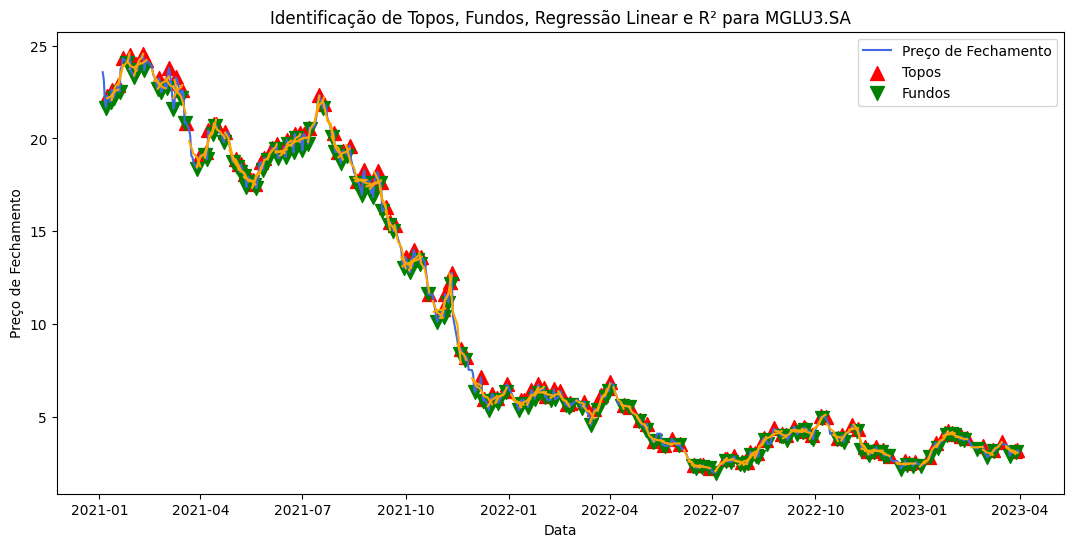

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Defina o ticker da ação e o período desejado
ticker = "MGLU3.SA"

start_date = "2021-01-02"
end_date = "2023-04-02"

# Obtenha os dados da ação utilizando a biblioteca yfinance

#data = yf.download(ticker, start=start_date, end=end_date,period=period)

data = yf.download(ticker, start=start_date, end=end_date)
df = data


# Encontre os topos (máximos) e fundos (mínimos)
data['local_max'] = data['Close'][
  (data['Close'].shift(1) < data['Close']) &
  (data['Close'].shift(-1) < data['Close'])]

data['data'] = data.index

listaTodosValores = data['Close'].tolist()
listaTodosValoresData = data['data'].tolist()
listaTopos = data['local_max'].tolist()

data['local_min'] = data['Close'][
  (data['Close'].shift(1) > data['Close']) &
  (data['Close'].shift(-1) > data['Close'])]

listaFundos = data['local_min'].tolist()

# Lista para armazenar os valores dos topos em tendência de alta
valores_topos_tendencia_alta = []

# Lista para armazenar as posições dos topos em tendência de alta em relação à lista de todos os topos
posicoes_topos_tendencia_alta = []

# Lista para armazenar os valores dos topos em tendência de alta
valores_r2 = []

# Lista para armazenar as posições dos R2
posicoes_r2 = []

# Função para calcular a regressão linear
def linear_regression(x, y):
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m, c

# Função para calcular o coeficiente de determinação (R²)
def r_squared(y, y_pred):
    y_mean = np.mean(y)
    ss_total = np.sum((y - y_mean) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Plot dos preços de fechamento com topos e fundos destacados
plt.figure(figsize=(13, 6))
plt.plot(data.index, data['Close'], label='Preço de Fechamento', color='royalblue')
plt.scatter(data.index, data['local_max'], s=100, label='Topos', marker='^', color='red')
plt.scatter(data.index, data['local_min'], s=100, label='Fundos', marker='v', color='green')

# Calcular e plotar a regressão linear para os 10 dias anteriores a cada topo
for i, top_date in enumerate(data['local_max'].dropna().index):
    if top_date - pd.DateOffset(days=10) >= data.index[0]:
        start_date = top_date - pd.DateOffset(days=10)
        end_date = top_date
        subset = data[start_date:end_date]
        x = np.arange(len(subset))
        m, c = linear_regression(x, subset['Close'])
        y_pred = m * x + c
        r2 = r_squared(subset['Close'], y_pred)

        if m > 0 and r2 > 0.80:
            tendencia = "Tendencia de alta"
            posicoes_topos_tendencia_alta.append(listaTopos.index(subset['local_max'].iloc[-1]))  # Armazena a posição do topo em tendência de alta
            valores_topos_tendencia_alta.append(subset['Close'].iloc[-1])  # Armazena o valor do topo em tendência de alta
            valores_r2.append(r2)  # Armazena o valor de R²
            posicoes_r2.append(listaTopos.index(subset['local_max'].iloc[-1]))  # Armazena a posição do R²
        elif m < 0:
            tendencia = "Tendência de Baixa"

        else:
            tendencia = "Sem Tendência"

        plt.plot(subset.index, y_pred, color='orange', linestyle='-')


plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title(f'Identificação de Topos, Fundos, Regressão Linear e R² para {ticker}')
plt.legend()
plt.show()



In [3]:

# Calcular e imprimir os resultados de R² e tendência para cada topo
for i, top_date in enumerate(data['local_max'].dropna().index):
    if top_date - pd.DateOffset(days=10) >= data.index[0]:
        start_date = top_date - pd.DateOffset(days=10)
        end_date = top_date
        subset = data[start_date:end_date]
        x = np.arange(len(subset))
        m, c = linear_regression(x, subset['Close'])
        y_pred = m * x + c
        r2 = r_squared(subset['Close'], y_pred)

        if m > 0:
            tendencia = "Tendência de Alta"

        elif m < 0:
            tendencia = "Tendência de Baixa"
        else:
            tendencia = "Sem Tendência"

        print(f"Topo {i + 1}:")
        print(f"Data do Topo: {top_date}")
        print(f"R²: {r2:.2f}")
        print(f"Tendência: {tendencia}\n")

if not valores_topos_tendencia_alta:
    print("Não foram encontrados topos em tendência de alta.")
else:
    print("Valores dos topos em tendência de alta:", valores_topos_tendencia_alta)

Topo 3:
Data do Topo: 2021-01-18 00:00:00
R²: 0.32
Tendência: Tendência de Alta

Topo 4:
Data do Topo: 2021-01-22 00:00:00
R²: 0.71
Tendência: Tendência de Alta

Topo 5:
Data do Topo: 2021-01-28 00:00:00
R²: 0.75
Tendência: Tendência de Alta

Topo 6:
Data do Topo: 2021-02-03 00:00:00
R²: 0.22
Tendência: Tendência de Baixa

Topo 7:
Data do Topo: 2021-02-09 00:00:00
R²: 0.87
Tendência: Tendência de Alta

Topo 8:
Data do Topo: 2021-02-12 00:00:00
R²: 0.13
Tendência: Tendência de Alta

Topo 9:
Data do Topo: 2021-02-23 00:00:00
R²: 0.53
Tendência: Tendência de Baixa

Topo 10:
Data do Topo: 2021-03-01 00:00:00
R²: 0.23
Tendência: Tendência de Baixa

Topo 11:
Data do Topo: 2021-03-04 00:00:00
R²: 0.27
Tendência: Tendência de Alta

Topo 12:
Data do Topo: 2021-03-10 00:00:00
R²: 0.08
Tendência: Tendência de Baixa

Topo 13:
Data do Topo: 2021-03-16 00:00:00
R²: 0.14
Tendência: Tendência de Alta

Topo 14:
Data do Topo: 2021-03-19 00:00:00
R²: 0.45
Tendência: Tendência de Baixa

Topo 15:
Data do T

In [4]:
print(valores_r2)
print(posicoes_r2)
print(valores_topos_tendencia_alta)

[0.8711741138365444, 0.8919736249219155, 0.9494592330588254, 0.9375216488129546, 0.8286301786689234, 0.8038129199783602, 0.8706343938093601, 0.8346355058733281, 0.8993767167855192, 0.9013351453598708, 0.8385064392634011, 0.8248495363213227, 0.8953228725011502, 0.8435088548239466, 0.929701298019121]
[25, 62, 105, 132, 213, 303, 306, 309, 378, 380, 397, 503, 507, 516, 548]
[24.542884826660156, 19.26766014099121, 19.688556671142578, 22.35422706604004, 12.767163276672363, 6.173133850097656, 6.547263145446777, 6.874626159667969, 2.74049711227417, 2.721790075302124, 3.058506965637207, 2.852735996246338, 3.600994110107422, 4.237013816833496, 3.638406991958618]


In [5]:
#(listaTopos)
#(listaToposValoresData)
#listaTodosValores)

print(posicoes_topos_tendencia_alta)
print(valores_topos_tendencia_alta)
print(listaTodosValores)
print(listaTodosValoresData)

[25, 62, 105, 132, 213, 303, 306, 309, 378, 380, 397, 503, 507, 516, 548]
[24.542884826660156, 19.26766014099121, 19.688556671142578, 22.35422706604004, 12.767163276672363, 6.173133850097656, 6.547263145446777, 6.874626159667969, 2.74049711227417, 2.721790075302124, 3.058506965637207, 2.852735996246338, 3.600994110107422, 4.237013816833496, 3.638406991958618]
[23.570148468017578, 23.158605575561523, 21.942684173583984, 21.66208839416504, 22.298107147216797, 21.970745086669922, 22.634824752807617, 22.466466903686523, 22.195222854614258, 22.41034698486328, 22.868654251098633, 22.522584915161133, 23.77591896057129, 23.84139060974121, 24.309053421020508, 24.084575653076172, 24.12198829650879, 24.496118545532227, 23.6356201171875, 23.317609786987305, 23.663679122924805, 23.991043090820312, 23.673032760620117, 24.17810821533203, 24.46805763244629, 24.542884826660156, 23.663679122924805, 23.991043090820312, 24.23422622680664, 23.850744247436523, 23.420495986938477, 23.326963424682617, 22.6815

In [6]:
#(listaFundos)

indiceDataFundos=[]
indice=0
valoresFundo=[]
for i in listaFundos:
  if (not(np.isnan(i))):
     #print(i)
     valoresFundo.append(i)
     indiceDataFundos.append(indice)
  indice+=1

print(indiceDataFundos)
print(valoresFundo)
print(listaTodosValores)
print(listaTodosValoresData)

[3, 5, 8, 11, 15, 19, 22, 26, 32, 35, 38, 42, 47, 50, 57, 61, 63, 66, 68, 73, 79, 81, 83, 85, 87, 90, 92, 94, 98, 100, 104, 106, 111, 113, 116, 118, 122, 125, 127, 133, 139, 142, 145, 149, 155, 158, 161, 164, 166, 169, 171, 175, 177, 184, 188, 190, 192, 194, 199, 205, 208, 210, 212, 217, 220, 227, 232, 235, 239, 241, 245, 252, 255, 258, 262, 266, 269, 272, 276, 282, 284, 286, 290, 296, 300, 305, 308, 316, 319, 325, 329, 333, 335, 340, 342, 350, 359, 361, 364, 368, 372, 379, 382, 388, 391, 393, 396, 398, 400, 404, 406, 414, 416, 418, 424, 427, 429, 432, 434, 440, 448, 450, 452, 459, 463, 465, 467, 469, 473, 476, 478, 487, 491, 494, 498, 504, 509, 515, 517, 519, 523, 526, 532, 539, 543, 553, 557]
[21.66208839416504, 21.970745086669922, 22.195222854614258, 22.522584915161133, 24.084575653076172, 23.317609786987305, 23.673032760620117, 23.663679122924805, 22.681589126586914, 22.494525909423828, 22.70029640197754, 21.605968475341797, 22.185869216918945, 20.83900260925293, 18.37910270690918,

In [7]:
# Selecionar os Fundos referente ao Topo anterior
def selecionar_proximo_fundo(indices, indice_anterior):
    indice_fundo_proximoTopoAnterior = None

    for indice in indices:
        if indice > indice_anterior:
            indice_fundo_proximoTopoAnterior = indice
            break

    return indice_fundo_proximoTopoAnterior

# Exemplo de uso:
lista_indices = indiceDataFundos


indices_referencia = posicoes_topos_tendencia_alta
indice_fundo_proximoTopoAnterior_lista = []

for indice_referencia in indices_referencia:
    indice_fundo_proximoTopoAnterior = selecionar_proximo_fundo(lista_indices, indice_referencia)
    indice_fundo_proximoTopoAnterior_lista.append(indice_fundo_proximoTopoAnterior)
    indice_fundo_proximoTopoAnterior_lista = list(filter(lambda x: x is not None, indice_fundo_proximoTopoAnterior_lista))
print("Lista do Indice do fundo_proximoTopoAnterior:", indice_fundo_proximoTopoAnterior_lista)


Lista do Indice do fundo_proximoTopoAnterior: [26, 63, 106, 133, 217, 305, 308, 316, 379, 382, 398, 504, 509, 517, 553]


In [8]:
#Selecionar valores de acordo com o indice dos fundos selecionados referente ao topo anterior
def selecionar_valores_por_indices(lista, indices):
    valores_indice_proximotopo = [lista[indice] for indice in indices]
    return valores_indice_proximotopo

# Exemplo de uso:
minha_lista = listaTodosValores
meus_indices = indice_fundo_proximoTopoAnterior_lista

valores_indice_proximotopo = selecionar_valores_por_indices(minha_lista, meus_indices)
print("Valores selecionados:", valores_indice_proximotopo)


Valores selecionados: [23.663679122924805, 18.87482452392578, 18.959003448486328, 21.624675750732422, 8.40855598449707, 6.051540851593018, 6.378904819488525, 5.5838799476623535, 2.6469650268554688, 2.5908451080322266, 2.8807950019836426, 2.834028959274292, 3.3297510147094727, 4.078009128570557, 2.9088549613952637]


In [9]:
# Compra e Venda

def stock_buy_sell(taxa_venda_aumento = 0.15, taxa_venda_baixa = 0.05):
  valor_especulado = 100

  for indice, valor_topo, valor_fundo in zip(posicoes_topos_tendencia_alta, valores_topos_tendencia_alta,valores_indice_proximotopo ):

    valor_especulado = valor_especulado
    comprou = False
    vendeu = False
    valor_compra = 0
    valor_venda = 0
    retorno = 0
    qtd_ações = 0
    print("\n\n","="*20, "Topo Referência", indice, "="*20)

    zip_lists = zip(listaTodosValoresData, listaTodosValores)

    for timestamp, valor_atual in list(zip_lists)[indice+1:]:

      # ato de comprar
      if not comprou and valor_atual > valor_topo:
        comprou = True
        valor_compra = valor_topo
        distancia = valor_atual - valor_fundo
        porcentagem = (distancia / valor_fundo)
        #Especulação compra
        qtd_ações = valor_especulado/valor_compra
        valor_especulado = qtd_ações*valor_compra
        print("Data da Compra = ", timestamp)
        print("Valor da Ação no Ato da Compra = R$ ",round( valor_compra, 2))
        print("Porcentagem da distância do rompimento em relação ao fundo: {:.2f}%".format(porcentagem))


      # ato de vender
      # se valor subiu acima 3x a porcentagem do fundo ou abaixou abaixo 1x  a porcentagem do fundo anterior, venda ação
      if comprou and (valor_atual >= valor_compra+(valor_compra*porcentagem*3) or valor_atual < valor_fundo*(1-porcentagem)):
          valor_venda = valor_atual
          # especulação venda
          valor_especulado = qtd_ações*valor_venda
          print("Data da Venda = ", timestamp)
          print("Valor da Ação no Ato da Venda= R$ ", round(valor_venda, 2))
          #print("Rendimentos = R$ ", round(valor_venda - valor_compra, 2))
          print("Retorno Total do Capital Inicial Investido = R$ ",round(valor_especulado, 2))


          vendeu = True
          # interrompendo iteração atual, pois venda e compra da referencia atual foram realizadas
          break

    if not comprou:
      print("Compra não realizada. Ações não ultrapassaram ou se equipararam a valor referência")
    if not vendeu:
      print("Venda não realizada. Ações não ultrapassaram ou se equipararam a valor referência")

In [10]:
stock_buy_sell() # estratégia: venda acima 3x a porcentagem ou abaixou abaixo 1x a porcentagem



 ==================== Topo Referência 25 ====================
Compra não realizada. Ações não ultrapassaram ou se equipararam a valor referência
Venda não realizada. Ações não ultrapassaram ou se equipararam a valor referência


 ==================== Topo Referência 62 ====================
Data da Compra =  2021-04-08 00:00:00
Valor da Ação no Ato da Compra = R$  19.27
Porcentagem da distância do rompimento em relação ao fundo: 0.08%
Data da Venda =  2021-08-23 00:00:00
Valor da Ação no Ato da Venda= R$  16.96
Retorno Total do Capital Inicial Investido = R$  88.01


 ==================== Topo Referência 105 ====================
Data da Compra =  2021-06-17 00:00:00
Valor da Ação no Ato da Compra = R$  19.69
Porcentagem da distância do rompimento em relação ao fundo: 0.05%
Data da Venda =  2021-08-18 00:00:00
Valor da Ação no Ato da Venda= R$  17.62
Retorno Total do Capital Inicial Investido = R$  78.77


 ==================== Topo Referência 132 ====================
Compra não realiz

In [11]:
# Selecionando o primeiro valor
primeiro_valor = df['Close'].iloc[0]

# Selecionando o último valor
ultimo_valor = df['Close'].iloc[-1]

# Resultado
qtd_ações = 100/primeiro_valor
valor = qtd_ações*ultimo_valor



print("Primeiro valor:", round(primeiro_valor, 2))
print("Último valor:", round(ultimo_valor, 2))
print("Resultado Final:", round(valor, 2))

Primeiro valor: 23.57
Último valor: 3.1
Resultado Final: 13.13
